# THE SPARKS FOUNDATION - Data Science& Business Analytics Internship

# Prediction using Supervised ML

In [25]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
#reading the data from given link
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


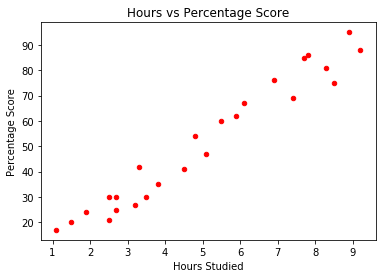

In [47]:
#scatter plot for distribution of data
df.plot(kind='scatter',x='Hours',y='Scores',color='red')
plt.title('Hours vs Percentage Score') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

Text(0, 0.5, 'Percentage Score')

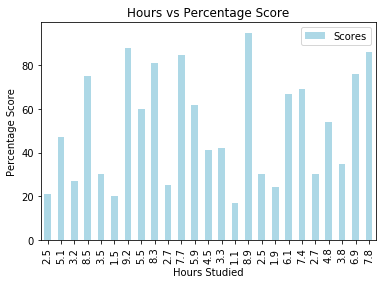

In [48]:
#scatter plot for distribution of data
df.plot(kind='bar',x='Hours',y='Scores',color='lightblue')
plt.title('Hours vs Percentage Score') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Percentage Score')

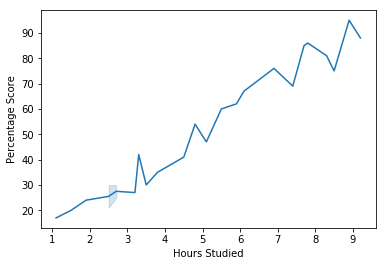

In [50]:
sns.lineplot(x = df["Hours"] , y = df["Scores"])
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

Text(0, 0.5, 'Percentage Score')

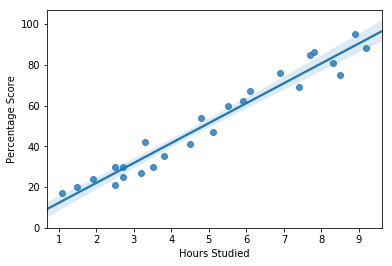

In [51]:
sns.regplot(x = df["Hours"] , y = df["Scores"])
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

In [70]:
#preparing the data
# Splitting the dataset into the Training set and Test set


X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [71]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [73]:
# Fitting Simple Linear Regression to the Training set
#Train the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

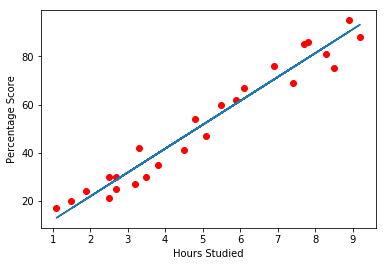

In [77]:
#regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y, color='red')
plt.plot(X, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

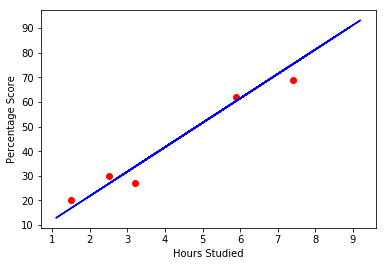

In [78]:
# Visualizing the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()



In [79]:
print("Intrecept:",regressor.intercept_)
print("Slope:",regressor.coef_)


Intrecept: 2.018160041434683
Slope: [9.91065648]


In [84]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [85]:
#R^2 (coefficient of determination) regression score function.
x_pred = regressor.predict(X_train)
from sklearn import metrics
print("R2(Training):",metrics.r2_score(y_train,x_pred))

R2(Training): 0.9515510725211552


In [86]:
#R^2 (coefficient of determination) regression score function. 
from sklearn import metrics
print("R2(Testing) ",metrics.r2_score(y_test, y_pred))

R2(Testing)  0.9454906892105356


In [95]:
#The accuracy of the model against the training data. 
model_score=regressor.score(X_train,y_train)
print("Model Score(Training):{:.4f}".format(model_score))

Model Score(Training):0.9516


In [90]:
#The accuracy of the model against the test data. 
model_score=regressor.score(X_test,y_test)
print("Model Score(Testing):{:.4f}".format(model_score))

Model Score(Testing):0.9455


In [91]:
#EVALUATION OF THE MODEL
from sklearn import metrics
print("Mean Absolute Error(MAE):",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error(MAE):",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error(RMSE):",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error(MAE): 4.183859899002975
Mean Squared Error(MAE): 21.5987693072174
Root Mean Squared Error(RMSE): 4.6474476121003665
